In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq

from scipy.io.wavfile import write, read

In [16]:
#Definimos frecuencia
f = 1
fs = 5 # Medidas por segundos

In [17]:
t = np.linspace(0.,1.,2*fs, endpoint=False)

# Señal periodica
x = np.cos(2*np.pi*f*t) + 4.*np.sin(4*np.pi*f*t)
#x = np.sin( np.sqrt(t) )

print(x)

[ 1.          4.61324306  2.660158   -2.660158   -4.61324306 -1.
  2.99520907  2.04212401 -2.04212401 -2.99520907]


Text(0, 0.5, '$tiempo[s]$')

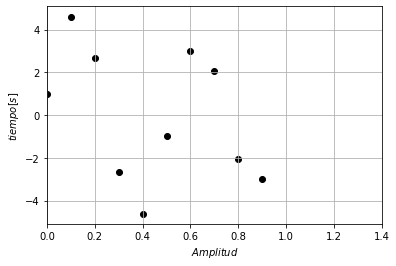

In [18]:
plt.figure()
plt.scatter(t,x, c='black')
plt.grid()
plt.xlim(0,1.4)
plt.xlabel(r'$Amplitud$')
plt.ylabel(r'$tiempo[s]$')

In [19]:
def GetFFT(x):
    
    Npoints = len(x)
    c = (2.0*np.pi)/len(x)
    
    fft = []
    
    for k in range(Npoints):
        
        Re= 0.
        Im= 0.
        
        for n in range(Npoints):
            
            Re += x[n]*np.cos( c*k*n )
            Im -= x[n]*np.sin( c*k*n )
            
        fft = np.append(fft, complex(Re,Im))
        
    return fft

In [20]:
Xw = GetFFT(x)
print(Xw)

[-4.44089210e-16+0.00000000e+00j  5.00000000e+00+2.22044605e-15j
  2.44249065e-15-2.00000000e+01j -7.77156117e-16+8.88178420e-16j
 -8.88178420e-16+1.11022302e-15j  4.44089210e-15+1.16719256e-15j
  4.44089210e-16+1.33226763e-15j -8.54871729e-15+9.32587341e-15j
 -2.00950367e-14+2.00000000e+01j  5.00000000e+00-6.66133815e-16j]


In [21]:
# FFT de numpy

Xw1 = fft(x)

#Xw1 = np.abs(Xw1)
print(Xw1)

[ 8.88178420e-16+0.00000000e+00j  5.00000000e+00+2.88657986e-15j
 -2.32528129e-15-2.00000000e+01j  4.44089210e-16-2.66241948e-18j
 -3.39253968e-16+1.77635684e-15j  4.10782519e-15+1.57599743e-17j
 -3.39253968e-16-1.77635684e-15j  5.55111512e-16+3.04705857e-17j
 -2.32528129e-15+2.00000000e+01j  5.00000000e+00-2.93014800e-15j]


In [22]:
# Implementar la transformada inversa

def GetIFFT(x):
    
    Npoints = len(x)
    c = (2.0*np.pi)/len(x)
    
    ifft = []
     
    for k in range(Npoints):
           
        Re = 0.
        Im = 0.
        
        for n in range(Npoints):
            
            Re += x[n]*np.cos( c*k*n )
            Im += x[n]*np.sin( c*k*n )
    
        ifft = np.append(ifft, complex(Re, Im)/Npoints)
    
    return ifft  

In [23]:
Xt = ifft(Xw) # 
Xt1 = GetIFFT(Xw1)

print(Xt)
print(Xt1)

[ 1.        +1.58221365e-15j  4.61324306+1.43759298e-15j
  2.660158  -1.02117456e-15j -2.660158  -2.53027217e-15j
 -4.61324306-2.06468832e-15j -1.        -1.30483081e-15j
  2.99520907+2.31013989e-15j  2.04212401+4.31594151e-15j
 -2.04212401-2.22894373e-16j -2.99520907-2.50202779e-15j]
[ 1.        +4.17527935e-16j  4.61324306-5.03507479e-16j
  2.660158  -9.78724973e-16j -2.660158  +1.24517850e-15j
 -4.61324306+2.23545540e-15j -1.        +9.05338200e-16j
  2.99520907-2.24984562e-15j  2.04212401-7.97631867e-16j
 -2.04212401+2.04108165e-15j -2.99520907+4.78115412e-15j]


Text(0, 0.5, '$tiempo[s]$')

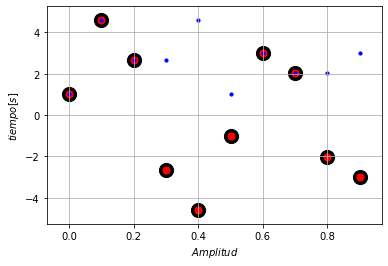

In [24]:
# Comparar resultados

plt.figure()
plt.scatter(t,x, c='black', s=200)
# Para regresar al dominio temporal, solo tomamos la parte real.

#plt.scatter(t,Xt.real, c='red', s=50)
#plt.scatter(t,Xt1.real, c='blue', s=10)

plt.scatter(t,Xt1.real, c='red', s=50)
plt.scatter(t,abs(Xt1), c='blue', s=10)

plt.grid()

plt.xlabel(r'$Amplitud$')
plt.ylabel(r'$tiempo[s]$')

In [25]:
# Ver la transformada en el espacio de las frecuencias

N = len(Xw)
frecuencias = np.fft.fftfreq(N)
print(frecuencias)

[ 0.   0.1  0.2  0.3  0.4 -0.5 -0.4 -0.3 -0.2 -0.1]


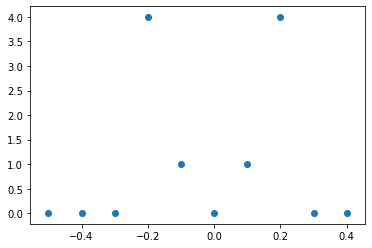

In [26]:
plt.scatter(frecuencias, 2.0*np.abs(Xw)/N )

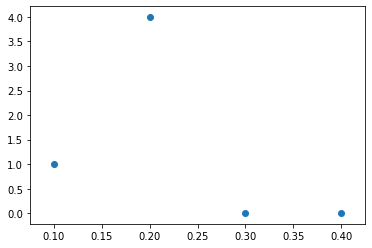

In [27]:
mask = frecuencias > 0.

plt.scatter(frecuencias[mask], 2.0*np.abs(Xw[mask])/N )

In [28]:
def Sampler(f, Npoints = 30, N_T=1):
    T = 2.0 * np.pi
    # calcular frecuencia angular
    omega = 2.0 * np.pi / T
    
    deltat = T/Npoints
    
    t = np.arange(Npoints) * deltat * N_T
    x = f(t)
    
    tModel = np.linspace(t.min(), t.max(), 1000)
    xModel = f( omega*tModel )
    
    return t,x,tModel,xModel

In [45]:
def f(t):
    return np.sin(t) + 2.0*np.sin(3*t) + 3*np.sin(5*t)

In [46]:
# Muestrear

t,x, tModel, xModel = Sampler(f)

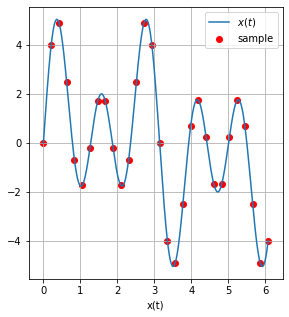

In [47]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.plot(tModel, xModel, label=r'$x(t)$')
plt.scatter(t,x, c='r' ,label='sample')
plt.xlabel(r't')
plt.xlabel(r'x(t)')
plt.grid()
plt.legend()

In [48]:
Xw = fft(x)
N = len(x)
frecuencias = np.fft.fftfreq(N)

Text(0.5, 1.0, 'N=15')

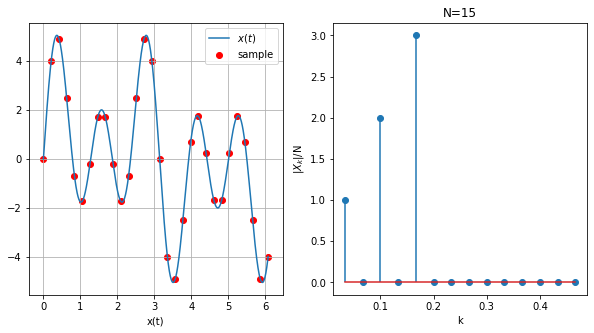

In [52]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.plot(tModel, xModel, label=r'$x(t)$')
plt.scatter(t,x, c='r' ,label='sample')
plt.xlabel(r't')
plt.xlabel(r'x(t)')
plt.grid()
plt.legend()

mask = frecuencias > 0.

plt.subplot(1,2,2)
#plt.scatter(frecuencias[mask], 2.0*np.abs(Xw[mask]/N))
plt.stem(frecuencias[mask], 2.0*np.abs(Xw[mask]/N), use_line_collection=True )
plt.xlabel('k')
plt.ylabel('|$X_k$|/N')
plt.title("N=15")

In [34]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
# Wav format : 16-bit PCM
# min value: -32768
# max value: +32767
# numpy dtype: int16

# Señal armónica

In [35]:
f = 440
fs = 44100
Amax = 32767

In [36]:
t = np.linspace(0.,7.,2*fs, endpoint=False)
x = np.sin(2.*np.pi*f*t)

In [22]:
scaled = np.int16( x*Amax )
print(scaled.min(),scaled.max())

-32766 32766


In [23]:
write('Test1.wav',44100,scaled)

(-22050.0, 22050.0)

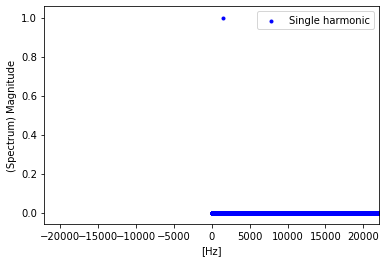

In [24]:
# Vamos al espectro de frecuencias

X = fft(x)

X = X * 2 / len(x)

freqs = fftfreq(len(x))*fs

mask = freqs >= 0

fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.abs(X[mask]), 
           c="b", label="Single harmonic", marker=".")
ax.legend(loc=0)

ax.set_xlabel('[Hz]')
ax.set_ylabel('(Spectrum) Magnitude')
ax.set_xlim(-fs/2,fs/2)

## Señal mezclada

In [25]:
f0 = 440
fs = 44100 # Sampling rate

# Superponer varias señales
f = np.array([2.,3.,4.,8.,12.])
f *= f0
Amp = np.array([0.3,0.4,0.2,0.2,0.1])

In [26]:
t = np.linspace(0.,2.,2*fs, endpoint=False)
x = np.sin( 2.*np.pi*f0*t )

for i in range(len(f)):
    x += Amp[i]*np.sin(2.*np.pi*f[i]*t)

(0, 0.0125)

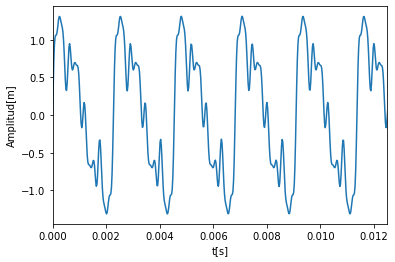

In [27]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('t[s]')
ax.set_ylabel('Amplitud[m]')
ax.set_xlim(0,1./80.)

In [28]:
scaled = np.int16( x*Amax/np.max(np.abs(x)) )
write('Test_MixSignal.wav', 44100, scaled)

In [29]:
# Calculando las frecuencias

X = fft(x)
X = X * 2 /len(x)
frecuencias = fftfreq(len(x))*fs

In [30]:
# Aplicando las mascaras

mask = freqs < 2000

(0, 22050.0)

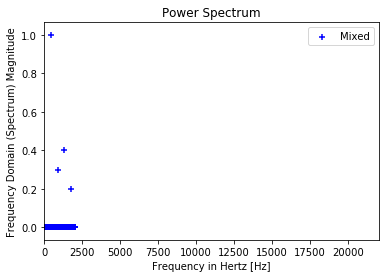

In [31]:
fig, ax = plt.subplots()
ax.scatter(frecuencias[mask], np.absolute(X[mask]), c="b", label="Mixed", marker="+")
ax.legend(loc=0)

ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, fs/2)

# Sonido de la radiación cósmica de fondo

In [32]:
x = np.random.uniform(-1., 1., fs * 2)
scaled = np.int16(x*Amax)
write('Test_CosmicMicroBackground.wav', 44100, scaled)

(0.0, 200.0)

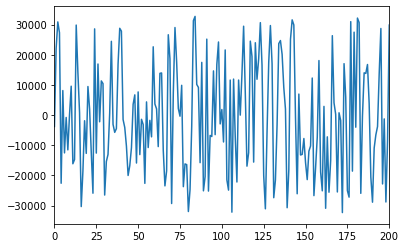

In [33]:
plt.plot(scaled)
plt.xlim(0.,200.)

In [34]:
# Calculando el espectro de frecuencias
# Calculando las frecuencias

X = fft(x)
X = X * 2 /len(x)
frecuencias = fftfreq(len(x))*fs

mask = frecuencias >= 0

(0, 0.02)

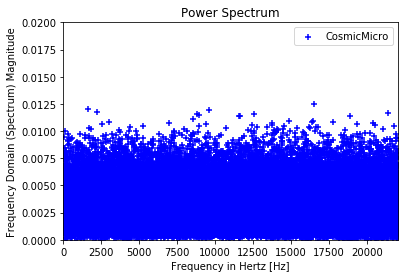

In [35]:
fig, ax = plt.subplots()
ax.scatter(frecuencias[mask], np.absolute(X[mask]), c="b", label="CosmicMicro", marker="+")
ax.legend(loc=0)

ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, fs/2)
ax.set_ylim(0, 0.02)

# Sonidos Do y Sol

In [36]:
rated, do = read('data/Do.wav')
rates, sol = read('data/Sol.wav')

In [37]:
print(rated, do.shape[0], rated/float(do.shape[0]))

16000 49600 0.3225806451612903


In [38]:
fftdo = np.fft.rfft(do)
fftsol = fft(sol)

In [39]:
# Division Entera // 
Frecuenciasdo = np.arange(0, do.shape[0]//2 + 1)
#*rated/do.shape[0]
#Frecuenciasdo = np.fft.fftfreq(do.shape[0]//2+1,1)
#Frecuenciasdo = np.fft.fftshift(Frecuenciasdo)
#Frecuenciasdo *= rated/float(do.shape[0])

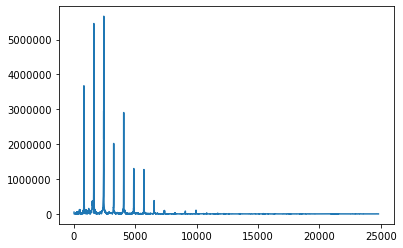

In [40]:
plt.plot(Frecuenciasdo, np.abs(fftdo))

In [41]:
mask = Frecuenciasdo < 500 

In [42]:
# frecuencias mayores a la fundamental
ii = np.argmax(fftdo)

In [43]:
ii_A = np.abs(Frecuenciasdo) > (Frecuenciasdo[ii])
ii_B = np.abs(Frecuenciasdo) < (Frecuenciasdo[ii])

In [44]:
# Hacer cero todos los modos menos el de la frecuencia dominante
#fftdo[ii_A | ii_B] = 0.
fftdo[ii_A ] = 0.

In [45]:
#fftdo[ii] = 0.

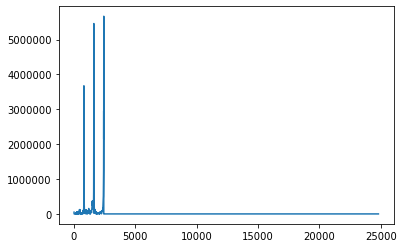

In [46]:
plt.plot(Frecuenciasdo, np.abs(fftdo))

In [47]:
NewDo = np.fft.irfft(fftdo)
NewDo = NewDo.astype(np.int16)

In [48]:
write("NewDo.wav", rated, NewDo)

In [56]:
# Quiero hacer un masking entre las frecuencias mayores a 2000 y menores a 5000 Hz
rated, do = read('data/Do.wav')

In [57]:
fftdo = np.fft.rfft(do)
# Division Entera // 
Frecuenciasdo = np.arange(0, do.shape[0]//2 + 1)

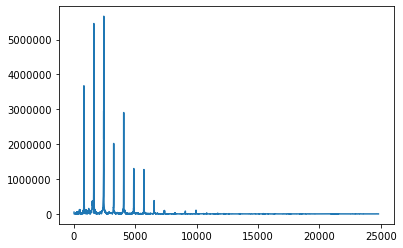

In [58]:
plt.plot(Frecuenciasdo, np.abs(fftdo))

In [61]:
mask1 = np.abs(Frecuenciasdo) > 5000 
mask2 = np.abs(Frecuenciasdo) < 3000

fftdo[mask1 | mask2] = 0.
Frecuenciasdo1 = np.arange(len(fftdo))

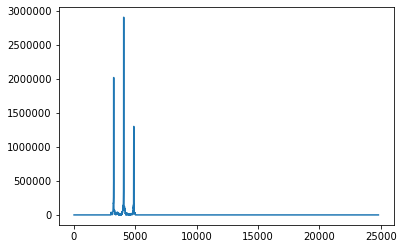

In [62]:
plt.plot(Frecuenciasdo1,np.abs(fftdo))

In [64]:
NewDo = np.fft.irfft(fftdo)
NewDo = NewDo.astype(np.int16)
write("NewDo.wav",rated,NewDo)

# Comparasión con un resultado análitico

In [49]:
Np = 2**12
f = 10/(2*np.pi)
tmin = -20.
tmax = 50.

t = np.arange(tmin,tmax, ((tmax-tmin)/Np))
Ts=t[2]-t[1]
Fs=1/Ts

print(Fs)

58.51428571428571


In [50]:
x = 2*np.exp( -4*t )*np.cos(2*np.pi*f*t)*(t>=0)*1.0

In [51]:
X = np.fft.fft(x)*Ts
X1 = np.fft.fftshift(X)

In [52]:
frq = np.arange(-Fs/2,Fs/2,Fs/Np)

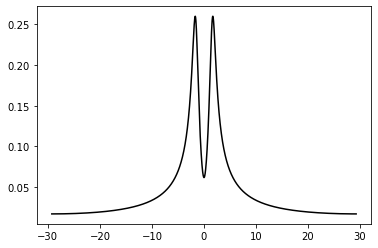

In [53]:
plt.plot(frq,abs(X1), c='k')

In [54]:
# Ahora comparemos con la expresión análitica

w = 2*np.pi*frq

AX = (1/(4+1j*(w-10)) + (1/(4+1j*(w+10)))) 

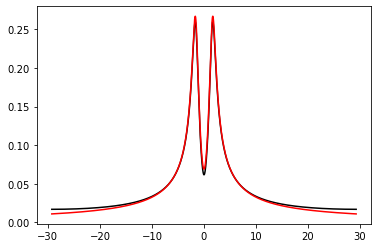

In [55]:
plt.plot(frq,abs(X1), c='k')
plt.plot(frq,abs(AX), c='r')